Animals project

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [29]:
# Import dataframe from aac_intakes_outcomes.csv
csv_file_path = "/home/john/code/joagap/animals/data/aac_intakes_outcomes.csv"
df = pd.read_csv(csv_file_path)
print(df.head())

  age_upon_outcome animal_id_outcome        date_of_birth outcome_subtype  \
0         10 years           A006100  2007-07-09 00:00:00             NaN   
1          7 years           A006100  2007-07-09 00:00:00             NaN   
2          6 years           A006100  2007-07-09 00:00:00             NaN   
3         10 years           A047759  2004-04-02 00:00:00         Partner   
4         16 years           A134067  1997-10-16 00:00:00             NaN   

      outcome_type sex_upon_outcome  age_upon_outcome_(days)  \
0  Return to Owner    Neutered Male                     3650   
1  Return to Owner    Neutered Male                     2555   
2  Return to Owner    Neutered Male                     2190   
3         Transfer    Neutered Male                     3650   
4  Return to Owner    Neutered Male                     5840   

   age_upon_outcome_(years) age_upon_outcome_age_group     outcome_datetime  \
0                      10.0                (7.5, 10.0]  2017-12-07 14:07:

In [30]:
# Check unique ids
unique_ids = df["animal_id_outcome"].nunique()

In [31]:
unique_ids

71961

In [32]:
duplicate_ids = df[df["animal_id_outcome"].duplicated()]["animal_id_outcome"].unique()
duplicate_ids

array(['A006100', 'A245945', 'A282897', ..., 'A768908', 'A768910',
       'A768917'], dtype=object)

In [43]:
len(duplicate_ids)

6071

In [33]:
len(duplicate_ids)/unique_ids * 100

8.436514222981893

In [38]:
# How to remove unique ids (df clean)
df.drop_duplicates(subset=["animal_id_outcome"], keep="first", inplace=True)

In [39]:
df[df["animal_id_outcome"].duplicated()]["animal_id_outcome"].unique()

array([], dtype=object)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71961 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            71961 non-null  object 
 1   animal_id_outcome           71961 non-null  object 
 2   date_of_birth               71961 non-null  object 
 3   outcome_subtype             35456 non-null  object 
 4   outcome_type                71955 non-null  object 
 5   sex_upon_outcome            71960 non-null  object 
 6   age_upon_outcome_(days)     71961 non-null  int64  
 7   age_upon_outcome_(years)    71961 non-null  float64
 8   age_upon_outcome_age_group  71961 non-null  object 
 9   outcome_datetime            71961 non-null  object 
 10  outcome_month               71961 non-null  int64  
 11  outcome_year                71961 non-null  int64  
 12  outcome_monthyear           71961 non-null  object 
 13  outcome_weekday             719

/tmp/ipykernel_112493/2186747525.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


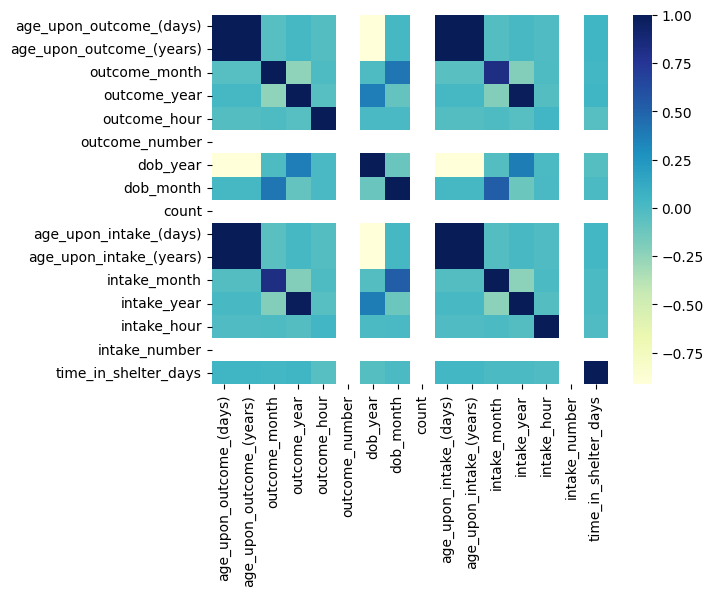

In [41]:
# Correlations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assuming "df" is the name of your pandas dataframe
corr_matrix = df.corr()

# create a heatmap of the correlations
sns.heatmap(corr_matrix, cmap="YlGnBu")

# show the plot
plt.show()

In [45]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [46]:
# Drop columns: outcome_subtype: outcome_number, found_location, intake_type count, intake_number, time_in_shelter, time_in_shelter_days
#columns_to_drop = ["column1", "column2", "column3"]
columns_to_drop = ["outcome_number", "found_location", "intake_type", "count", "intake_number", 
                   "time_in_shelter", "time_in_shelter_days"]

# drop the specified columns from the dataframe
df_dropped = df.drop(columns=columns_to_drop)

# print the first few rows of the modified dataframe to check if columns are dropped
print(df_dropped.head())

  age_upon_outcome animal_id_outcome        date_of_birth outcome_subtype  \
0         10 years           A006100  2007-07-09 00:00:00             NaN   
3         10 years           A047759  2004-04-02 00:00:00         Partner   
4         16 years           A134067  1997-10-16 00:00:00             NaN   
5         15 years           A141142  1998-06-01 00:00:00             NaN   
6         15 years           A163459  1999-10-19 00:00:00             NaN   

      outcome_type sex_upon_outcome  age_upon_outcome_(days)  \
0  Return to Owner    Neutered Male                     3650   
3         Transfer    Neutered Male                     3650   
4  Return to Owner    Neutered Male                     5840   
5  Return to Owner    Spayed Female                     5475   
6  Return to Owner    Intact Female                     5475   

   age_upon_outcome_(years) age_upon_outcome_age_group     outcome_datetime  \
0                      10.0                (7.5, 10.0]  2017-12-07 14:07:

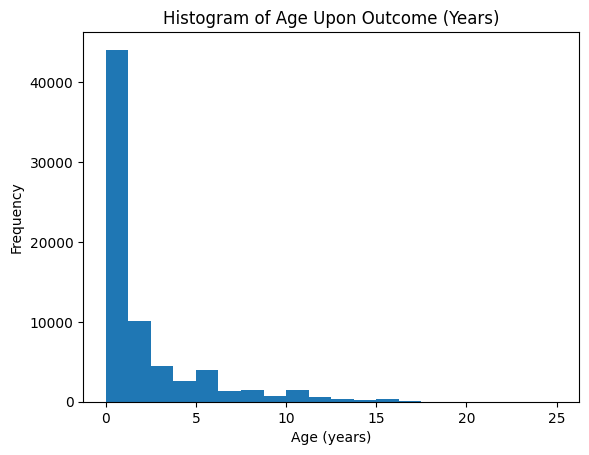

In [48]:
import matplotlib.pyplot as plt
df["age_upon_outcome_(years)"].plot(kind="hist", bins=20)
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.title("Histogram of Age Upon Outcome (Years)")
plt.show()

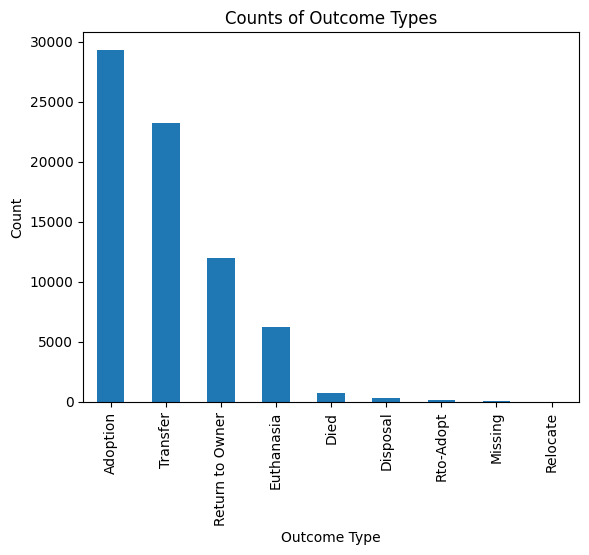

In [49]:
outcome_counts = df["outcome_type"].value_counts()
outcome_counts.plot(kind="bar")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.title("Counts of Outcome Types")
plt.show()

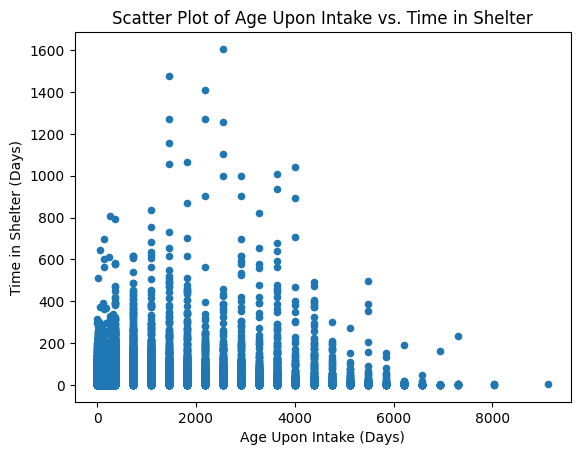

In [50]:
df.plot(kind="scatter", x="age_upon_intake_(days)", y="time_in_shelter_days")
plt.xlabel("Age Upon Intake (Days)")
plt.ylabel("Time in Shelter (Days)")
plt.title("Scatter Plot of Age Upon Intake vs. Time in Shelter")
plt.show()

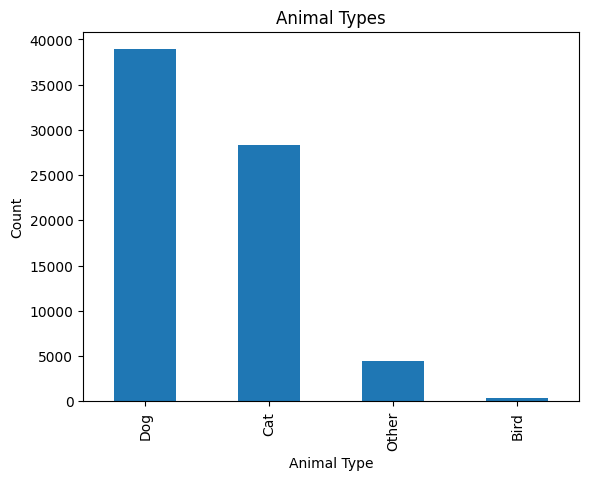

In [51]:
# create a bar chart of animal types
df['animal_type'].value_counts().plot.bar()
plt.title('Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

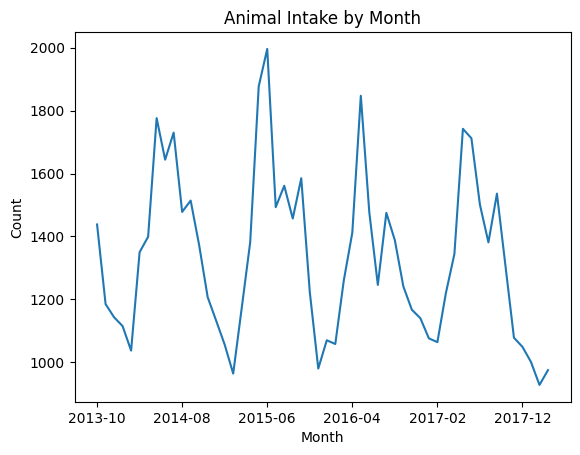

In [52]:
df['intake_monthyear'].value_counts().sort_index().plot()
plt.title('Animal Intake by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()